In [2]:
%matplotlib notebook
import time
import numpy as np
from PIL import Image as pil_image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
# define custom functions
def Mean_Squared_over_true_Error(y_true, y_pred):
    y_true = K.cast(y_true, y_pred.dtype)  # Casts a tensor to a different dtype and returns it.
    diff_ratio = K.square((y_pred - y_true) / K.clip(K.abs(y_true), K.epsilon(), None))
    loss = K.mean(diff_ratio, axis=-1)
    # Return a function
    return loss

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# load the model
bestmodel = "/Volumes/The_Attic/school/research/ml/hyperParam_model_1.h5"
model = load_model(
    bestmodel,
    custom_objects={
        "Mean_Squared_over_true_Error": Mean_Squared_over_true_Error,
        "r2_keras": r2_keras
    }
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 16)      4336      
_________________________________________________________________
batch_normalization (BatchNo (None, 510, 510, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 253, 253, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      1

In [4]:
# pick out a particular layer to maximize
layer_name = "conv2d_3"
filter_index = 0

# First Look at CNN Layers

In [5]:
from vis.visualization import visualize_activation, get_num_filters
from vis.utils import utils
layer_index = utils.find_layer_idx(model, layer_name)

filters = np.arange(get_num_filters(model.layers[layer_index]))
filters = filters[:10]

vis_images = []
for idx in filters:
    print("idx: ", idx)
    img = visualize_activation(model, layer_index, filter_indices=idx)
    
    #img = utils.draw_text(img, f"Filter {idx}")
    vis_images.append(img)

idx:  0
idx:  1
idx:  2
idx:  3
idx:  4
idx:  5
idx:  6
idx:  7
idx:  8
idx:  9


<IPython.core.display.Javascript object>


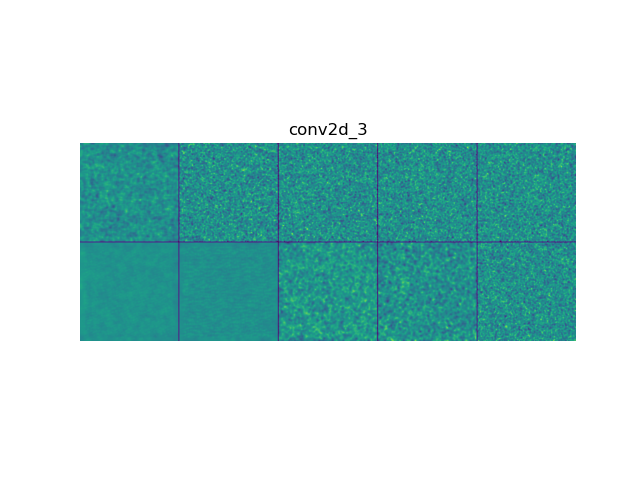

In [19]:
layer0 = [vis[:, :, :1] for vis in vis_images]
stitched = utils.stitch_images(layer0, cols=5)
plt.axis("off")
plt.imshow(stitched[:, :, 0])
plt.title(layer_name)
plt.show()

<IPython.core.display.Javascript object>


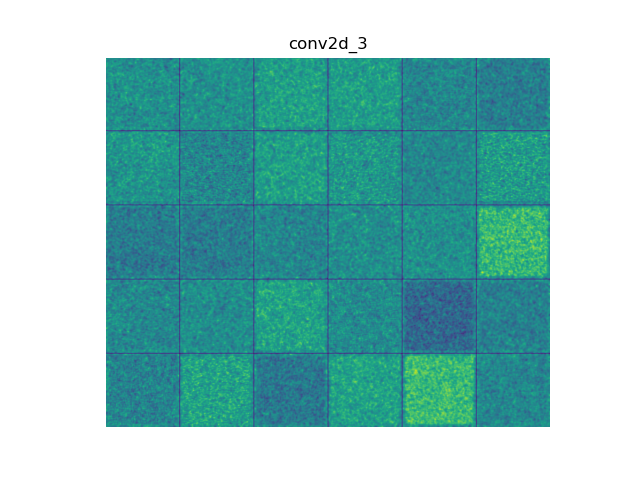

In [27]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[0][:, :, i:i + 1] for i in range(vis_images[0].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


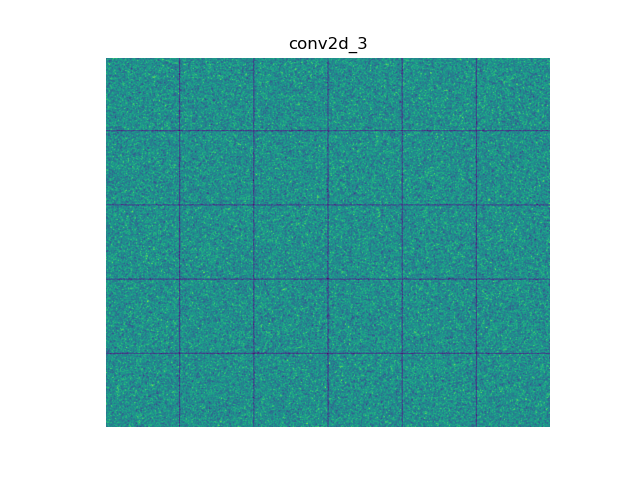

In [28]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[1][:, :, i:i + 1] for i in range(vis_images[1].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


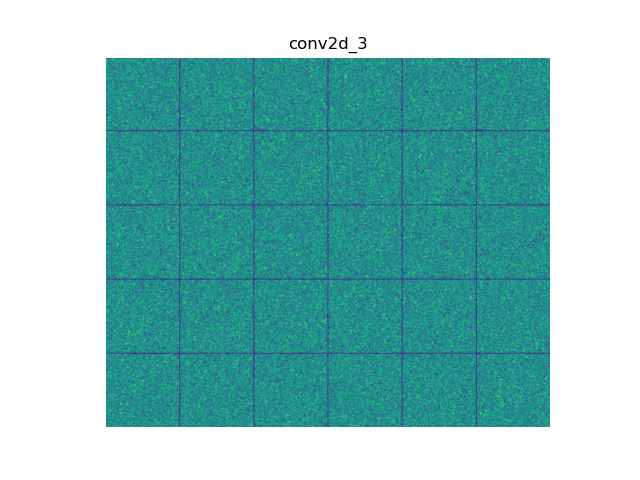

In [29]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[2][:, :, i:i + 1] for i in range(vis_images[2].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


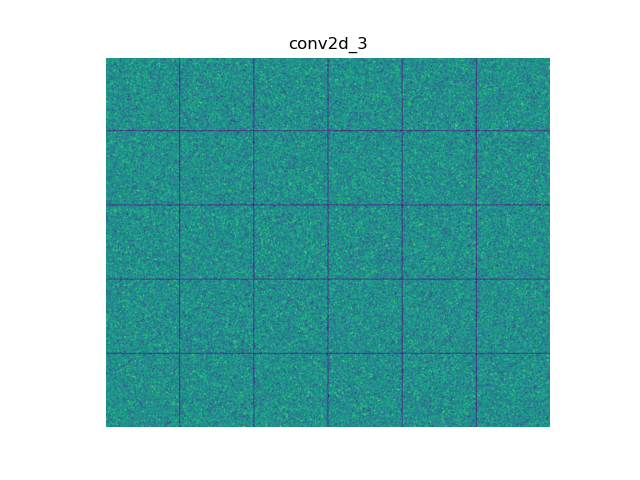

In [30]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[3][:, :, i:i + 1] for i in range(vis_images[3].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


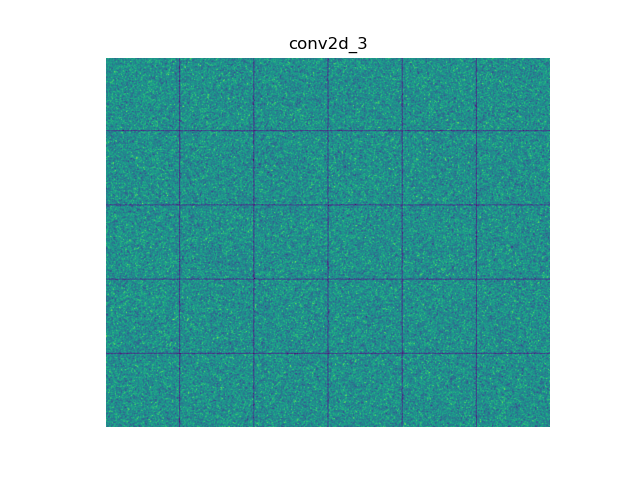

In [31]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[4][:, :, i:i + 1] for i in range(vis_images[4].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


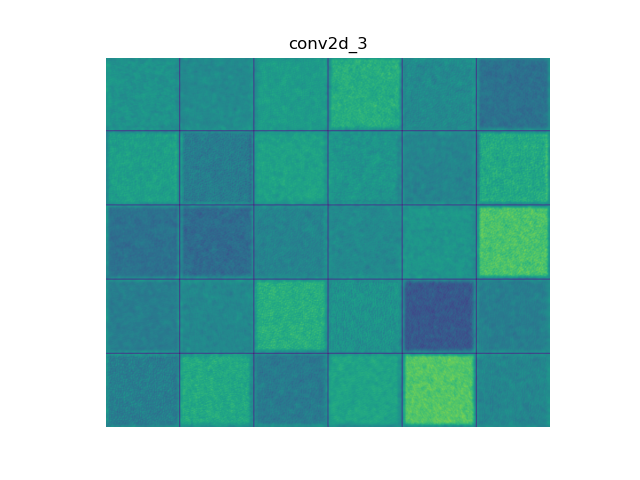

In [32]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[5][:, :, i:i + 1] for i in range(vis_images[5].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


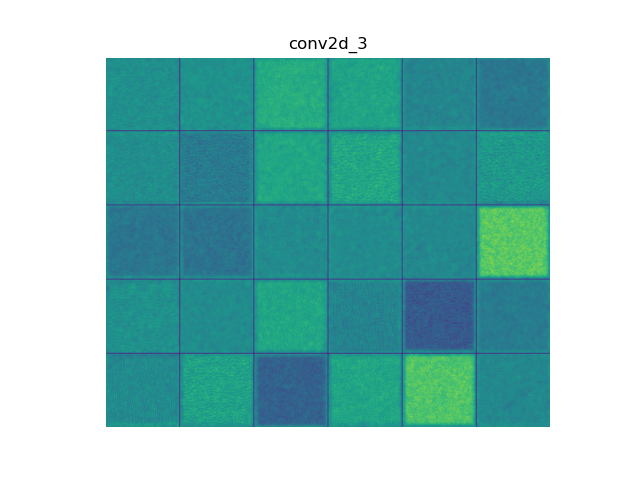

In [33]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[6][:, :, i:i + 1] for i in range(vis_images[6].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


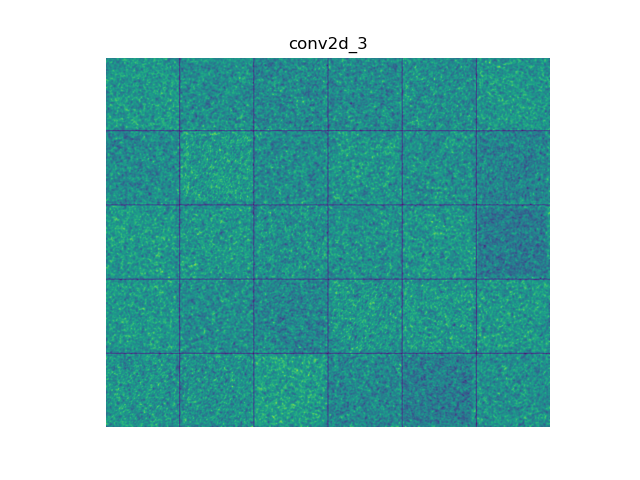

In [34]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[7][:, :, i:i + 1] for i in range(vis_images[7].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


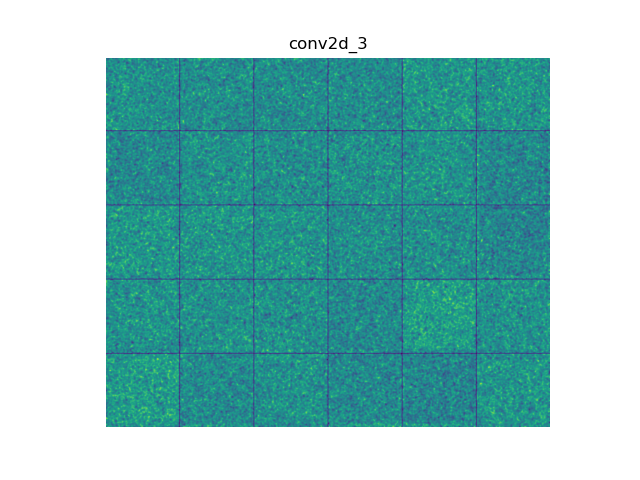

In [35]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[8][:, :, i:i + 1] for i in range(vis_images[8].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


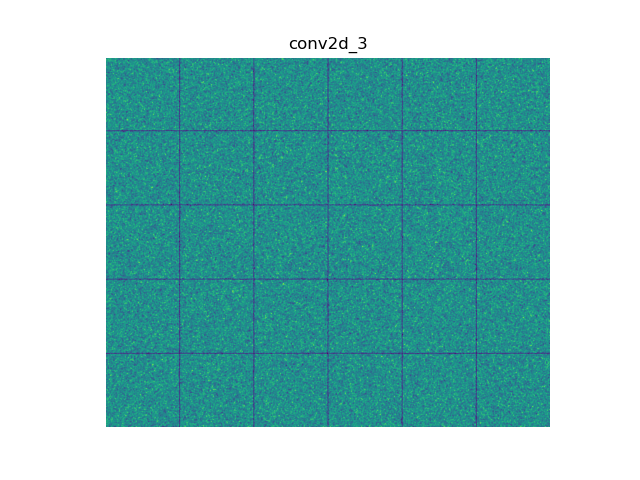

In [36]:
fig = plt.figure()
ax = plt.gca()
layers = [vis_images[9][:, :, i:i + 1] for i in range(vis_images[9].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

# Now look at Dense Neurons

In [37]:
layer_name = "dense_3"
layer_index = utils.find_layer_idx(model, layer_name)

filters = np.arange(get_num_filters(model.layers[layer_index]))
filters = filters[:10]

vis_images_dense = []
for idx in filters:
    print("idx: ", idx)
    img = visualize_activation(model, layer_index, filter_indices=idx)

    vis_images_dense.append(img)

idx:  0
idx:  1
idx:  2
idx:  3
idx:  4
idx:  5
idx:  6
idx:  7
idx:  8
idx:  9


<IPython.core.display.Javascript object>


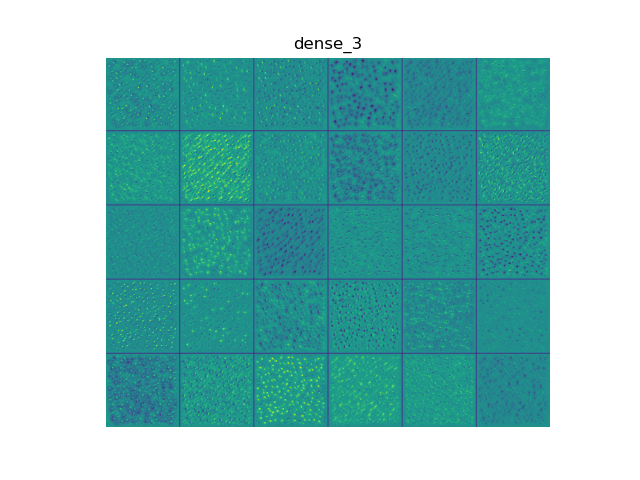

In [38]:
ilayer = 0
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


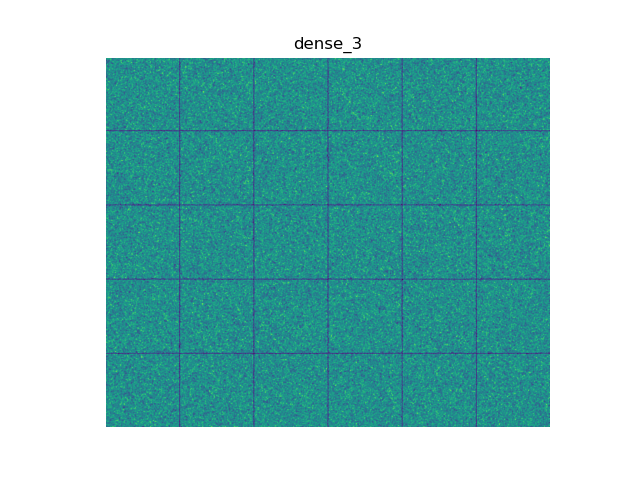

In [40]:
ilayer = 1
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


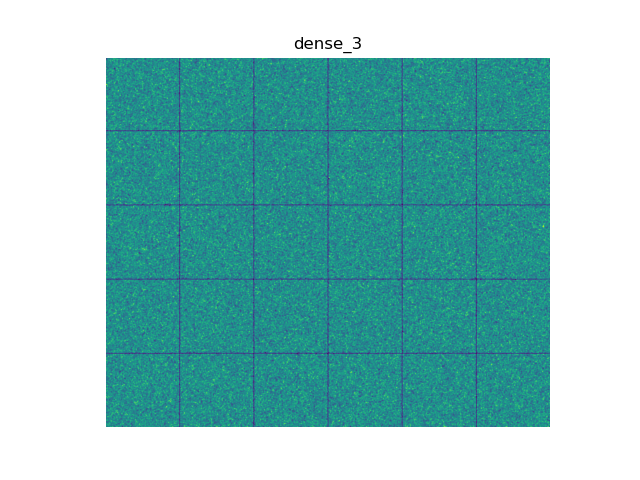

In [41]:
ilayer = 2
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


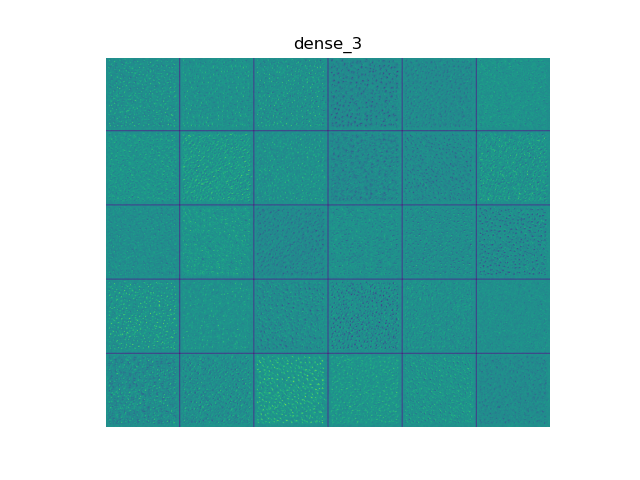

In [42]:
ilayer = 3
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


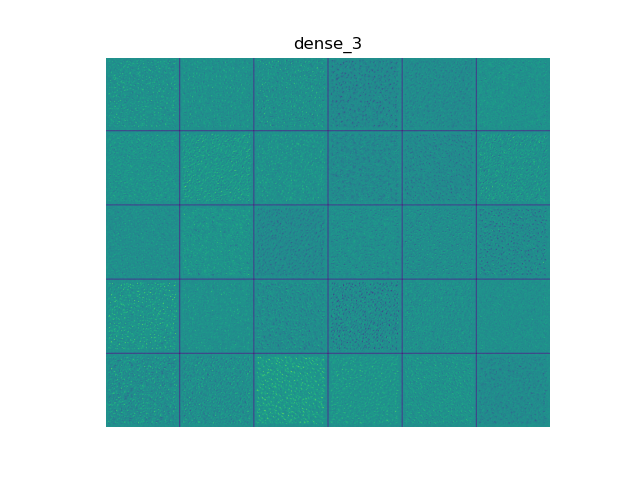

In [43]:
ilayer = 4
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


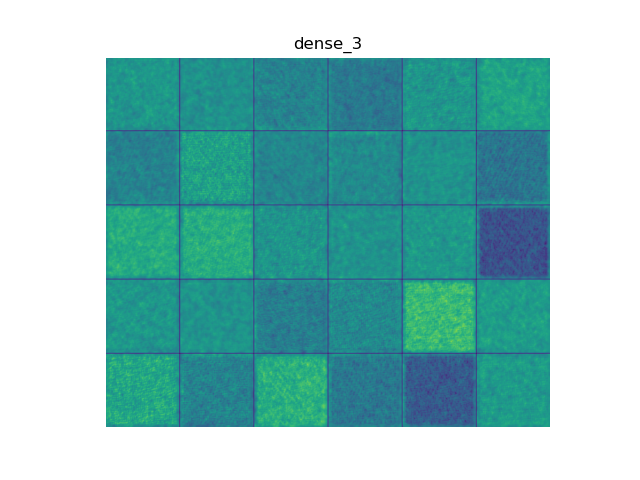

In [44]:
ilayer = 5
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


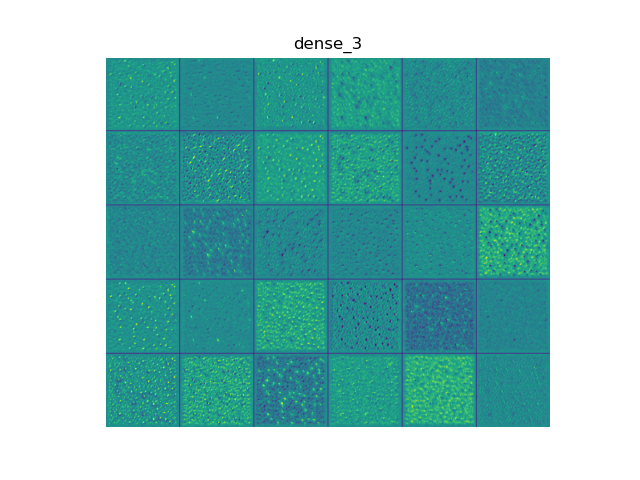

In [45]:
ilayer = 6
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


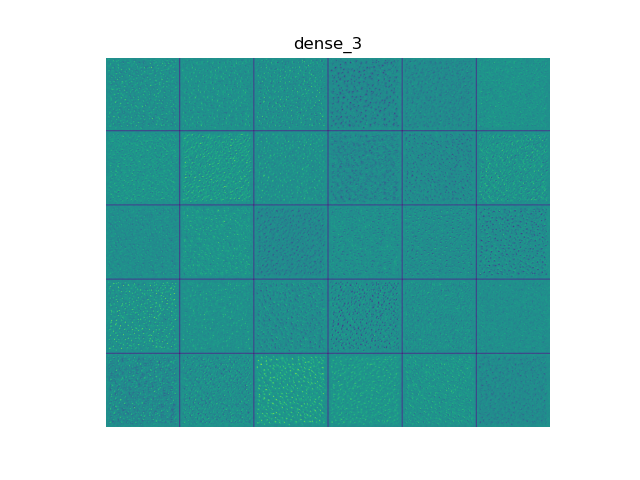

In [46]:
ilayer = 7
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

<IPython.core.display.Javascript object>


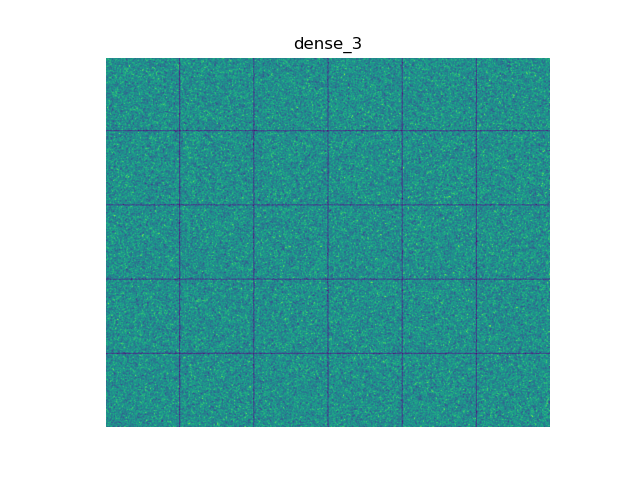

In [47]:
ilayer = 8
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()

/Users/plaplant/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


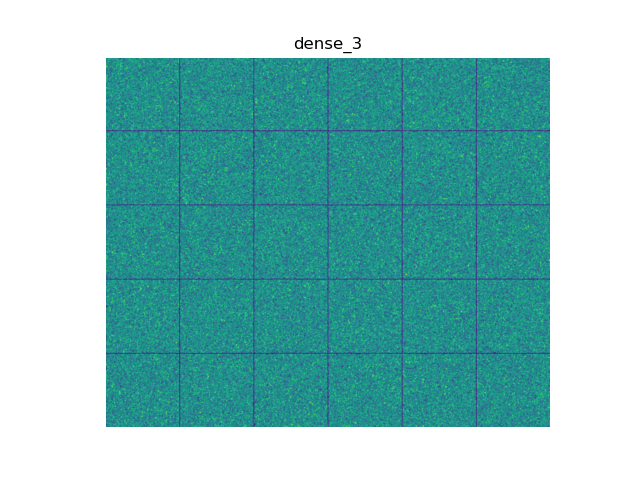

In [48]:
ilayer = 9
fig = plt.figure()
ax = plt.gca()
layers = [vis_images_dense[ilayer][:, :, i:i + 1] for i in range(vis_images_dense[ilayer].shape[2])]
stitched = utils.stitch_images(layers, cols=6)
ax.axis("off")
ax.imshow(stitched[:, :, 0])
ax.set_title(layer_name)
fig.show()